In [1]:
import ganja.io as io
import os

Welcome to JupyROOT 6.10/02


In [2]:
base = os.getenv('SCRATCH')+'/ganja'

version = 'nov2'
folder = base+'/split/'+version

inputs = {folder: np.random.choice(np.arange(0,100),5)}


In [3]:
reload(io)
images = io.read_datasets_images( inputs  )

_,info = io.read_datasets(inputs)

reading images: 0it [00:00, ?it/s]
nov2:   0%|          | 0/5 [00:00<?, ?it/s]

reading images from /scratch/snx3000/musella/ganja/split/nov2



nov2:  80%|████████  | 4/5 [00:00<00:00, 18.63it/s]
reading images: 1it [00:00,  3.42it/s]             
reading datasets: 0it [00:00, ?it/s]
nov2: 100%|██████████| 5/5 [00:10<00:00,  2.12s/it]
reading datasets: 1it [00:10, 10.95s/it]           


In [4]:
weights = np.load('weights_nov2_pt.npy',encoding = 'latin1') #,pickle_kwargs=dict(encoding='latin1'))
variables = weights[0]
bins = weights[2:]
weights = weights[1]

In [5]:
import ganja.preprocessing as preprocessing
reload(preprocessing)

<module 'ganja.preprocessing' from '/users/musella/Ganja/GanjaPy/ganja/preprocessing.py'>

In [6]:
# info = _
sample_weigths = preprocessing.reweight(info,variables,bins,weights)
# printvariables)

offset True
(301,)
ptGen


In [7]:
from functools import reduce

reco = np.concatenate( list( map(lambda x: x['reco'], reduce(lambda y,z: y+z, images) )  ) ) 

In [8]:
gen = np.concatenate( list( map(lambda x: x['gen'], reduce(lambda y,z: y+z, images) )  ) ) 

In [9]:
sample_weigths.mean()

0.3963909555469457

In [10]:
reco_mean = np.average(reco,weights=sample_weigths,axis=0)
reco_mean2 = np.average(reco**2,weights=sample_weigths,axis=0)

reco_std = np.sqrt(reco_mean2 - reco_mean**2)

In [11]:
gen_mean = np.average(gen,weights=sample_weigths,axis=0)
gen_mean2 = np.average(gen**2,weights=sample_weigths,axis=0)

gen_std = np.sqrt(gen_mean2 - gen_mean**2)

In [12]:
diff = reco - gen

diff_mean = np.average(diff,weights=sample_weigths,axis=0)
diff_mean2 = np.average(diff**2,weights=sample_weigths,axis=0)

diff_std = np.sqrt(diff_mean2 - diff_mean**2)

In [14]:
# plt.imshow(std[:-1,:-1,0]/mean[:-1,:-1,0],cmap='Blues')
# plt.colorbar()

from matplotlib.colors import LogNorm 
from matplotlib.ticker import LogFormatter

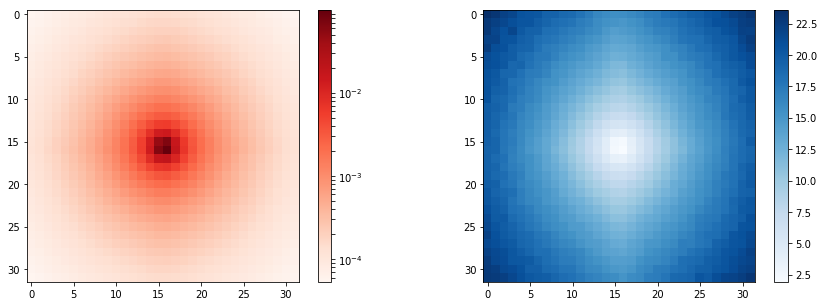

In [42]:
plt.figure(figsize=(15,5))

plt.subplot(121)
plt.imshow(reco_mean[:-1,:-1,0],cmap='Reds',norm=LogNorm())
plt.colorbar()

plt.subplot(122)
plt.imshow(reco_std[:-1,:-1,0]/reco_mean[:-1,:-1,0],cmap='Blues')
plt.colorbar()

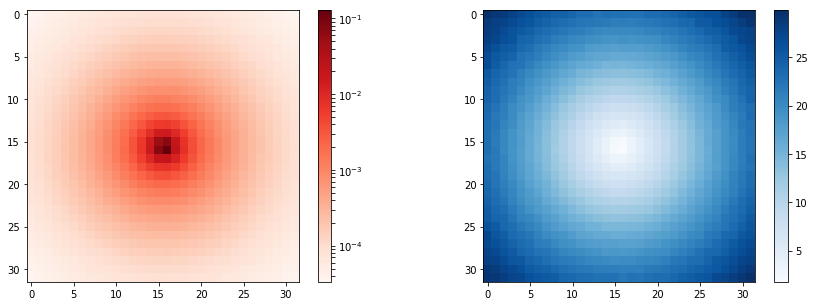

In [43]:
plt.figure(figsize=(15,5))

plt.subplot(121)
plt.imshow(gen_mean[:-1,:-1,0],cmap='Reds',norm=LogNorm())
plt.colorbar()

plt.subplot(122)
plt.imshow(gen_std[:-1,:-1,0]/gen_mean[:-1,:-1,0],cmap='Blues')
plt.colorbar()

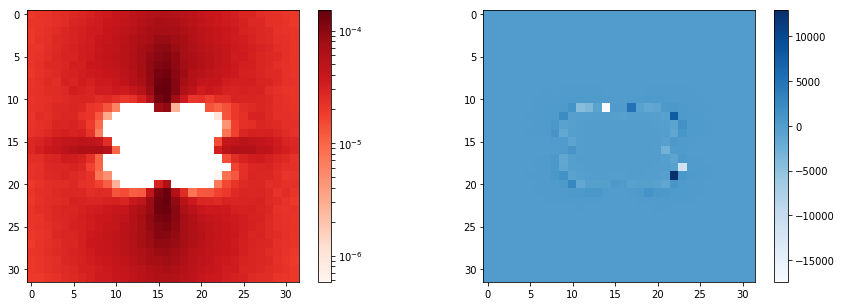

In [44]:
plt.figure(figsize=(15,5))

plt.subplot(121)
plt.imshow(diff_mean[:-1,:-1,0],cmap='Reds',norm=LogNorm())
plt.colorbar()

plt.subplot(122)
plt.imshow(diff_std[:-1,:-1,0]/diff_mean[:-1,:-1,0],cmap='Blues')
plt.colorbar()

In [17]:
reco_min = reco.min(axis=0)
reco_max = reco.max(axis=0)

In [18]:
gen_min = gen.min(axis=0)
gen_max = gen.max(axis=0)

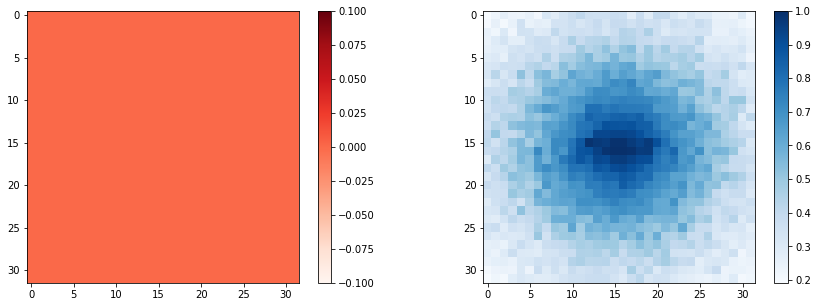

In [19]:
plt.figure(figsize=(15,5))

plt.subplot(121)
plt.imshow(gen_min[:-1,:-1,0],cmap='Reds')
plt.colorbar()

plt.subplot(122)
plt.imshow(gen_max[:-1,:-1,0],cmap='Blues')
plt.colorbar()

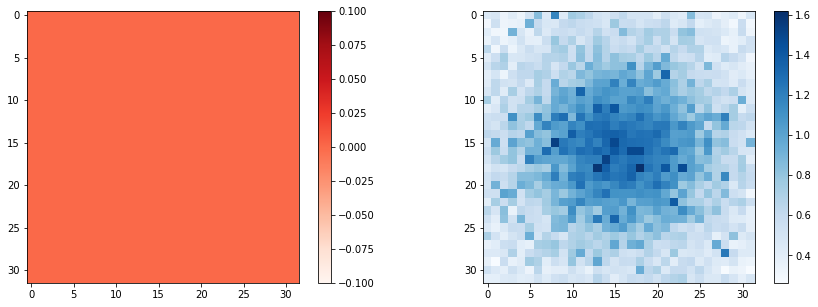

In [20]:
plt.figure(figsize=(15,5))

plt.subplot(121)
plt.imshow(reco_min[:-1,:-1,0],cmap='Reds')
plt.colorbar()

plt.subplot(122)
plt.imshow(reco_max[:-1,:-1,0],cmap='Blues')
plt.colorbar()

In [21]:
diff_min = diff.min(axis=0)
diff_max = diff.max(axis=0)

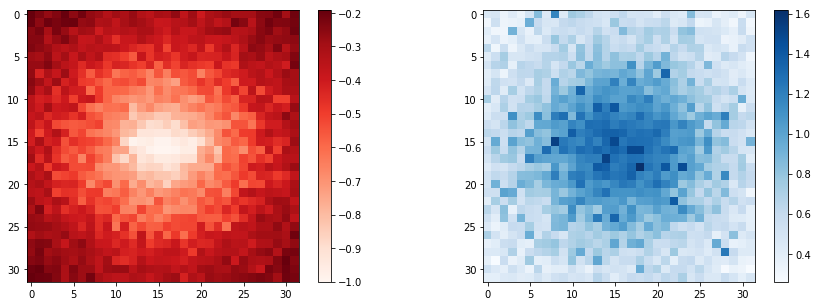

In [22]:
plt.figure(figsize=(15,5))

plt.subplot(121)
plt.imshow(diff_min[:-1,:-1,0],cmap='Reds')
plt.colorbar()

plt.subplot(122)
plt.imshow(diff_max[:-1,:-1,0],cmap='Blues')
plt.colorbar()

In [23]:
diff_min.min(), diff_max.max()

(-1.0000064, 1.6178523)

In [24]:
reco_min.min(), reco_max.max()

(0.0, 1.6178523)

In [25]:
gen_min.min(), gen_max.max()

(0.0, 1.0000139)

In [26]:
normed_gen = (gen - gen_mean)/np.sqrt(gen_std**2 + 0.02**2)

In [27]:
normed_reco = (reco - reco_mean)/np.sqrt(reco_std**2 + 0.02**2)

In [28]:
normed_gen.min(),normed_gen.max()

(-0.5627984799644945, 37.107309499911956)

In [29]:
gen_mean.max()

0.12947265363712965

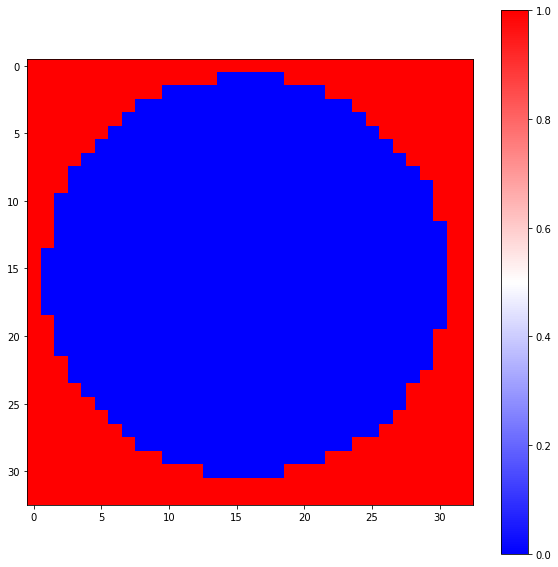

In [30]:
plt.imshow((gen_mean[:,:,0] < 1.e-4).astype(np.float))

plt.colorbar()

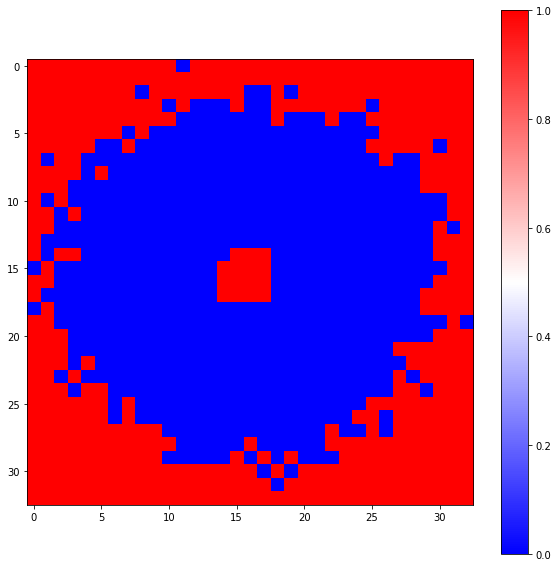

In [31]:
plt.imshow((normed_gen.max(axis=0)[:,:,0]<20).astype(np.float))

plt.colorbar()

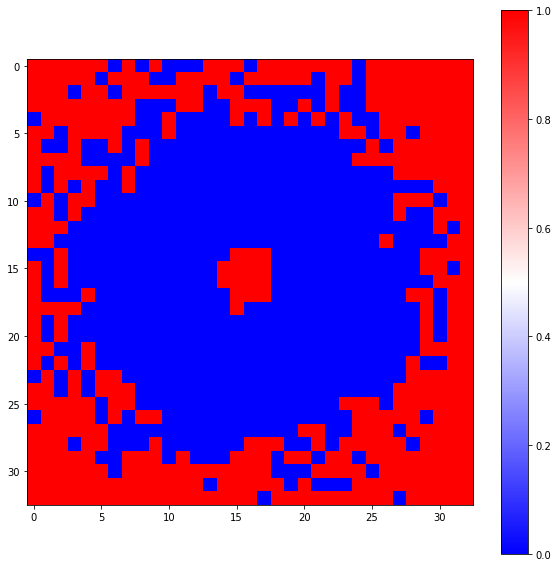

In [36]:
plt.imshow((normed_reco.max(axis=0)[:,:,0]<30).astype(np.float))

plt.colorbar()

In [38]:
np.savez('moments_%s.npz' % version, reco_mean=reco_mean, reco_std=reco_std, gen_mean=gen_mean, gen_std=gen_std)

In [41]:
! ls -lh moments_nov2.npz

-rw-r--r-- 1 musella d78 35K Nov  6 23:49 moments_nov2.npz
